<a href="https://colab.research.google.com/github/LivroRelampagos/Estudo_de_Caso/blob/main/plota_LMA_3D_imagemradar_lagrangeano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Plota figura da Distribuição 3D de LMA no ScanTime do radar**

---
**OBJETIVO:** Este Google Colab plota a distribuição 3D de fontes de VHF e relâmpagos da brasildat para uma imagem do radar.



---



**DADOS DE ENTRADA**: Relâmpagos 
- **Tipo do dado:** Fontes de VHF da SPLMA e relâmpagos da brasildat da campanha CHUVA-Vale
- **Formato do dado:** arquivo ASCII 
- **Nome do arquivo:** tempestade_1_20120107_1507.csv
- **Gerado por:** Enrique Mattos - IRN/UNIFEI  

---

**DADOS DE SAÍDA:** Figura da distribuição 3D de relâmpagos
- **Tipo do dado:** Figura
- **Formato do dado:** arquivo JPG 
- **Nome do arquivo:** FlashLMA_acumulado_20120107_1512.jpg
- **Gerado por:** Enrique Mattos - IRN/UNIFEI 

---

**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:
1.   Instalação de bibliotecas
2.   Importação das bibliotecas
3.   Monta o drive da pessoa
4.   Importa funções
5.   Leitura da lista dos arquivos de relâmpagos
6.   Cálculo e plotagem das figuras


---
**OBSERVAÇÕES IMPORTANTES**: 
1. Fazer mudanças, veja em: **### >>> MUDANÇAS AQUI <<< ###**
    - 1. Caminho do seu drive 
    - 2. Número da tempestade


---

- **Realizado por:** Enrique V. Mattos - 11/12/2021
- **Atualizado por:** Enrique V. Mattos e Raquel Gonçalves Pereira - 10/03/2022


# **### >>> MUDANÇAS AQUI <<< ###**


- **Insira o caminho do seu drive**: alterar aqui

In [ ]:
dir = '/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/'

- **Caminhos dos diretórios**: aqui não precisa alterar

In [ ]:
# definindo os caminhos 
path_input = f'{dir}1_rastreamento_tempestades_radar_FCTH/output/'  # caminho do arquivo de rastreamento da tempestade
path_output = f'{dir}6_LMA_3D_imagem_radar/output/' # caminho onde as figuras serão salvas

# exibe na tela
print(path_input)
print(path_output)

/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/
/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/6_LMA_3D_imagem_radar/output/


# **Instala Bibliotecas**

In [ ]:
!pip install proplot

     |████████████████████████████████| 8.0 MB 11.3 MB/s 


# **Importa bibliotecas**

**importa bibliotecas**

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import proplot as plot
from scipy.spatial import ConvexHull, convex_hull_plot_2d

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/proplot/__init__.py:71: ProplotWarning: Rebuilding font cache. This usually happens after installing or updating proplot.
  register_fonts(default=True)


**monta drive para salvar arquivos de saída**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Cria a pasta para as figuras de sáida**

In [ ]:
import os
os.makedirs(f'{path_output}', exist_ok=True)

# **Define a função que plota o Mapa de LMA 3D**

In [ ]:
def plota_flashlma_acumulado(dir_output, file, df, df_br, nflashes_lma, total_fontes):

    """
    Plota distribuição 3D de LMA e relampagos da Brasildat dentro do ScanTime do radar

    Parâmetros de entrada:
                dir_output (str): nome do diretório onde será salva a figura 
                file (str): nome do arquivo (exemplo: tempestade_7_20120109_1723.csv)   
                df (DataFrame): dataframe de flashes da SPLMA 
                df_br (DataFrame): dataframe de relâmpagos da Brasildat
                nflashes_lma (int): quantidade de flashes da SPLMA daquela imagem do radar 
                total_fontes (int): quantidade de fontes da SPLMA daquela imagem do radar 

    Parâmetros de saída:
                plota a figura 3D de LMA e relâmpagos da Brasildat em formato PNG.
    """

    import os

    #---------------------------------#
    # Extrai data do arquivo
    #---------------------------------#
    file_name = os.path.basename(os.path.splitext(file)[0])
    ano, mes, dia, hor, min = file_name[11:15], file_name[15:17], file_name[17:19], file_name[20:22], file_name[22:24] 

    #---------------------------------#
    #   Separa IC e CG da Brasildat
    #---------------------------------#
    df_br_ic = df_br[ df_br['tipo'] == 'IC']
    df_br_cg = df_br[ df_br['tipo'] == 'CG']

    #---------------------------------#
    # Cria moldura da figura: 
    #---------------------------------#
    # https://proplot.readthedocs.io/en/latest/basics.html#ug-subplot
    gs = plot.GridSpec(nrows=3, ncols=2, pad=1)
    fig = plot.figure(span=False, figsize=(7, 8), sharey=False, sharex=False)

    #---------------------------------#
    # Figura a: Altura x Tempo
    #---------------------------------#
    ax = fig.subplot(gs[0, :])
    ax.scatter(0, 0, s=0, cmap='jet', label=f'SPLMA: Relâmpagos={nflashes_lma}')  
    ax.scatter(df['tempo'], df['alt'], c=df['tempo'], s=10, cmap='jet', label=f'SPLMA: Fontes={total_fontes}') # plota fontes de LMA
    ax.scatter(df_br_ic['tempo'].values, np.ones(df_br_ic['tempo'].shape[0]), marker='o', s=25, color='gray', label=f'BrasilDAT IN={df_br_ic.shape[0]}') # plota IC
    ax.scatter(df_br_cg['tempo'].values, np.ones(df_br_cg['tempo'].shape[0]), marker='x', s=25, color='black', label=f'BrasilDAT NS={df_br_cg.shape[0]}') # plota CG
    ax.format(ylim=(0, 20), xlabel='Tempo (s)', ylabel='Altitude (km)', yticks=([0, 5, 10, 15, 20]), small='15px', xtickminor=False, ytickminor=False)
    ax.legend(loc='ur', frameon=False, ncols=1)

    #---------------------------------#
    # Figura b: Altura x Longitude
    #---------------------------------#
    ax = fig.subplot(gs[1,0])
    ax.scatter(df['lon'], df['alt'], c=df['tempo'], s=10, cmap='jet')  # plota fontes
    ax.scatter(df_br_ic['lon'].values, np.ones(df_br_ic['lon'].shape[0]), marker='o', s=25, color='gray') # plota IC
    ax.scatter(df_br_cg['lon'].values, np.ones(df_br_cg['lon'].shape[0]), marker='x', s=25, color='black') # plota CG
    ax.format(ylim=(0, 20), xlabel='Longitude (°)', ylabel='Altitude (km)', yticks=([0, 5, 10, 15, 2]), xtickminor=False, ytickminor=False, small='15px')

    #---------------------------------#
    # Figura c: Histograma
    #---------------------------------#
    ax = fig.subplot(gs[1, 1])
    classes = np.arange(0, 20, 0.5)
    y, edges = np.histogram(df['alt'], classes)
    centers = 0.5*(edges[1:] + edges[:-1])
    ax.plot(y, centers,color='black')    
    ax.format(title='Histograma', small='15px', xlim=[0, max(y)], xtickminor=False, ytickminor=False)
    ax.legend(loc='ur', frameon=False)

    #---------------------------------#
    # Figura d: Latitude x Longitude
    #---------------------------------#
    ax = fig.subplot(gs[2, 0])

    ax.scatter(df['lon'], df['lat'], c=df['tempo'], s=10, cmap='jet') # plota fontes
    ax.scatter(df_br_ic['lon'].values, df_br_ic['lat'].values, marker='o', s=25, color='gray') # plota IC
    ax.scatter(df_br_cg['lon'].values, df_br_cg['lat'].values, marker='x', s=25, color='black') # plota CG
    ax.format(xlabel='Longitude (°)', ylabel='Latitude (°)', small='15px', xtickminor=False, ytickminor=False)
    #ax.format(xlim=(min(df['lon'].values)-0.01, max(df['lon'].values)+0.01), ylim=(min(df['lat'].values-0.01), max(df['lat'].values)+0.01), xlabel='Longitude (°)', ylabel='Latitude (°)', small='15px', xtickminor=False, ytickminor=False)

    #---------------------------------#
    # Figura e: Latitude x Altura
    #---------------------------------#
    ax = fig.subplot(gs[2, 1])
    ax.scatter(df['alt'], df['lat'], c=df['tempo'], s=10, cmap='jet') # plota fontes
    ax.scatter(np.ones(df_br_ic['lat'].shape[0]), df_br_ic['lat'].values, marker='o', s=25, color='gray') # plota IC
    ax.scatter(np.ones(df_br_cg['lat'].shape[0]), df_br_cg['lat'].values, marker='x', s=25, color='black') # plota CG
    ax.format(xlim=(0, 20), xlabel='Altitude (km)', ylabel='Latitude (°)', xticks=([0, 5, 10, 15, 20]), xtickminor=False, ytickminor=False, small='15px')

    #---------------------------------#
    # Formato eixos da figura
    #---------------------------------#
    fig.format(suptitle=f'Acumulado de relâmpagos da SPLMA e BrasilDAT - {ano}{mes}{dia} às {hor}:{min} UTC', abc=True, large='15px')

    #---------------------------------#
    # Salva figura
    #---------------------------------#
    plt.savefig(f'{path_output}FlashLMA_acumulado_{ano}{mes}{dia}_{hor}{min}.jpg', dpi=300, bbox_inches='tight')
    #df.head()

# **Define a função que faz a leitura dos dados de relâmpagos por imagem de radar**

In [ ]:
#-----------------------------------------------------------------------------------   
# Leitura dos dados de raios por imagem de radar 
#----------------------------------------------------------------------------------- 
def read_raios_porimagem(filename):

    ''' Função para ler os dados de relâmpagos da Brasildat e SPLMA separados por imagem de radar

    Exemplo do dado:
            INI_FLASH_LMA=55;Fontes=2
            area(km2);duracao(s);comprimento(km);ano;mes;dia;hor;min;seg;lat;lon;alt(m) 
            52.55;0.197991;7.25;2011;12;13;22;19;56.339645;-24.1650;-47.4339;7567.9000
            52.55;0.197991;7.25;2011;12;13;22;19;56.368057;-24.1565;-47.4044;8132.4000
            END_FLASH_LMA 

            INI_FLASH_BRASILDAT=3
            tipo;ano;mes;dia;hor;min;seg;lat;lon;pc(kA) 
            IC;2011;12;13;22;19;21.755556;-24.1796;-47.4274;4.4000
            IC;2011;12;13;22;19;21.778186;-24.1503;-47.4200;8.2000
            IC;2011;12;13;22;19;23.290068;-24.1121;-47.4872;5.3000
            END_FLASH_BRASILDAT   

    Parâmetros:
                filename (string): nome do arquivo com os dados de relâmpagos
                
    Retorna:
             dic_br (dicionario): dicionario com as informações dos relâmpagos da Brasildat
             dic_lma (dicionario): dicionario com as informações dos relâmpagos da SPLMA
    '''

    # Define variaveis da Brasildat
    tipo_br, ano_br, mes_br, dia_br, hor_br, min_br, seg_br, lat_br, lon_br, pc_br = [], [], [], [], [], [], [], [], [], []

    # Define os dicionários que serão alojados os dados da Brasildat e SPLMA
    dic_br = {}
    dic_lma = {}
    nflashes_lma = 0 # quantidade de relâmpagos da SPLMA do arquivo

    # Leitura do arquivo 
    with open(filename, 'r') as file:
        rawdata = file.readlines()

    # Extrai as informações do arquivo 
    for i in range(len(rawdata)):

        # quebra a linha onde tem ';' e coloca numa lista
        linha = rawdata[i].split(';')
    
        # identificando o tipo de linha
        if len(linha) == 0:
            pass

        # LINHA DA BRASILDAT
        elif linha[0][0:19] == 'INI_FLASH_BRASILDAT':

            # extrai a quantidade de relâmpagos
            lixo, nbr = linha[0].strip().split('=')

            # loop dos relâmpagos da brasildat
            for ii in range(i+2, i+2+int(nbr), 1):
                tipo, ano, mes, dia, hor, min, seg, lat, lon, pc = rawdata[ii].strip().split(';')
                tipo_br.append(tipo)
                ano_br.append(ano)
                mes_br.append(mes)
                dia_br.append(dia)
                hor_br.append(hor)
                min_br.append(min)
                seg_br.append(seg)
                lat_br.append(lat)
                lon_br.append(lon)
                pc_br.append(pc)

            # coloca as informações dos relãmpagos da brasildat num dicionário
            dic_br = {'tipo': tipo_br,
                      'ano': ano_br,
                      'mes': mes_br,
                      'dia': dia_br,
                      'hor': hor_br,
                      'min': min_br,
                      'seg': seg_br,
                      'lat': lat_br,
                      'lon': lon_br,
                      'pc': pc_br
                      } 

        # LINHA DA SPLMA
        elif linha[0][0:13] == 'INI_FLASH_LMA':

            # extrai o número do flash e quantidade de fontes
            lixo, flash_id = linha[0].split('=')
            lixo, nfontes = linha[1].strip().split('=')
            nflashes_lma = flash_id
            flash_id = 'flash' + str(flash_id)

            #print('aki', flash_id, nfontes)
        
            # loop nas fontes daquele flash
            area_lma, dur_lma, comp_lma, ano_lma, mes_lma, dia_lma, hor_lma, min_lma, seg_lma, lat_lma, lon_lma, alt_lma = [], [], [], [], [], [], [], [], [], [], [], []
            for jj in range(i+2, i+2+int(nfontes), 1):
                area0, dur0, comp0, ano0, mes0, dia0, hor0, min0, seg0, lat0, lon0, alt0 = rawdata[jj].strip().split(';')
            
                area_lma = area0
                dur_lma = dur0
                comp_lma = comp0
                ano_lma.append(ano0)
                mes_lma.append(mes0)
                dia_lma.append(dia0)
                hor_lma.append(hor0)
                min_lma.append(min0)
                seg_lma.append(seg0)
                lat_lma.append(lat0)
                lon_lma.append(lon0)
                alt_lma.append(alt0)

            # colocar as informações do flash num dicionário
            # self.family_data.update({actual_family_id: {'header': [], 'evolution': [], 'ending_line': []}})
            ###dic_lma.update({flash_id: {'alt': alt0}})
            dic_lma.update({flash_id: { 'fontes': nfontes, 
                                        'area': area_lma, 
                                        'dur': dur_lma,
                                        'comp': comp_lma, 
                                        'ano': ano_lma, 
                                        'mes': mes_lma, 
                                        'dia': dia_lma, 
                                        'hor': hor_lma, 
                                        'min': min_lma, 
                                        'seg': seg_lma, 
                                        'lat': lat_lma, 
                                        'lon': lon_lma,
                                        'alt': alt_lma
                            }})

    return dic_br, dic_lma, int(nbr), int(nflashes_lma)

# **Leitura da Lista de arquivos**

In [ ]:
files = sorted(glob.glob(f'{path_input}tempestade_20*csv'))
ntimes = len(files)

print(ntimes)
print(list(files))

23
['/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1703.csv', '/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1708.csv', '/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1713.csv', '/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1718.csv', '/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1723.csv', '/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1728.csv', '/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1733.csv', '/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1738.csv', '/content/drive/MyDr

# **Cálculos e plotagem da figura**

Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1703.csv
Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1708.csv
Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1713.csv
Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1718.csv
Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1723.csv
Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempestade_20120109_1728.csv
Processando arquivo ===>>> /content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/tempest

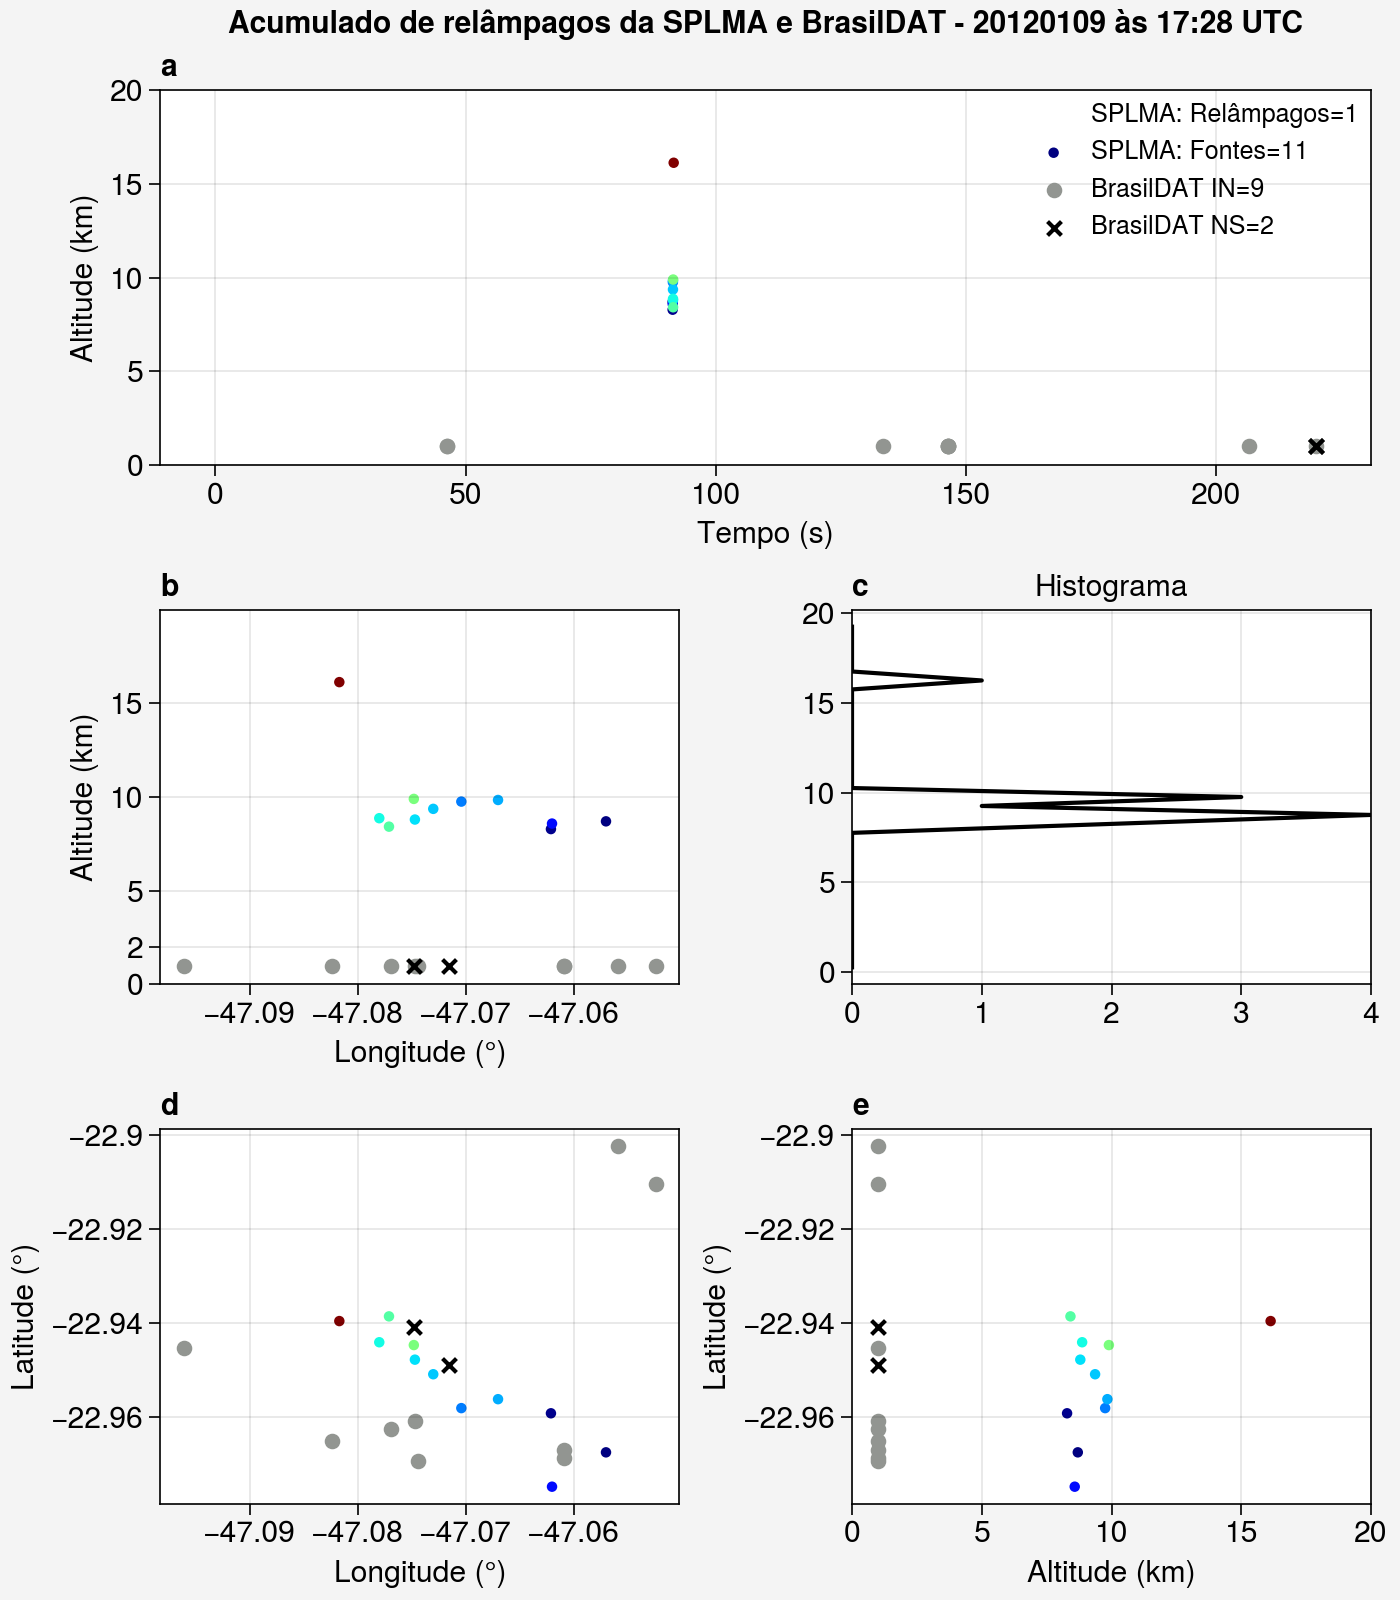

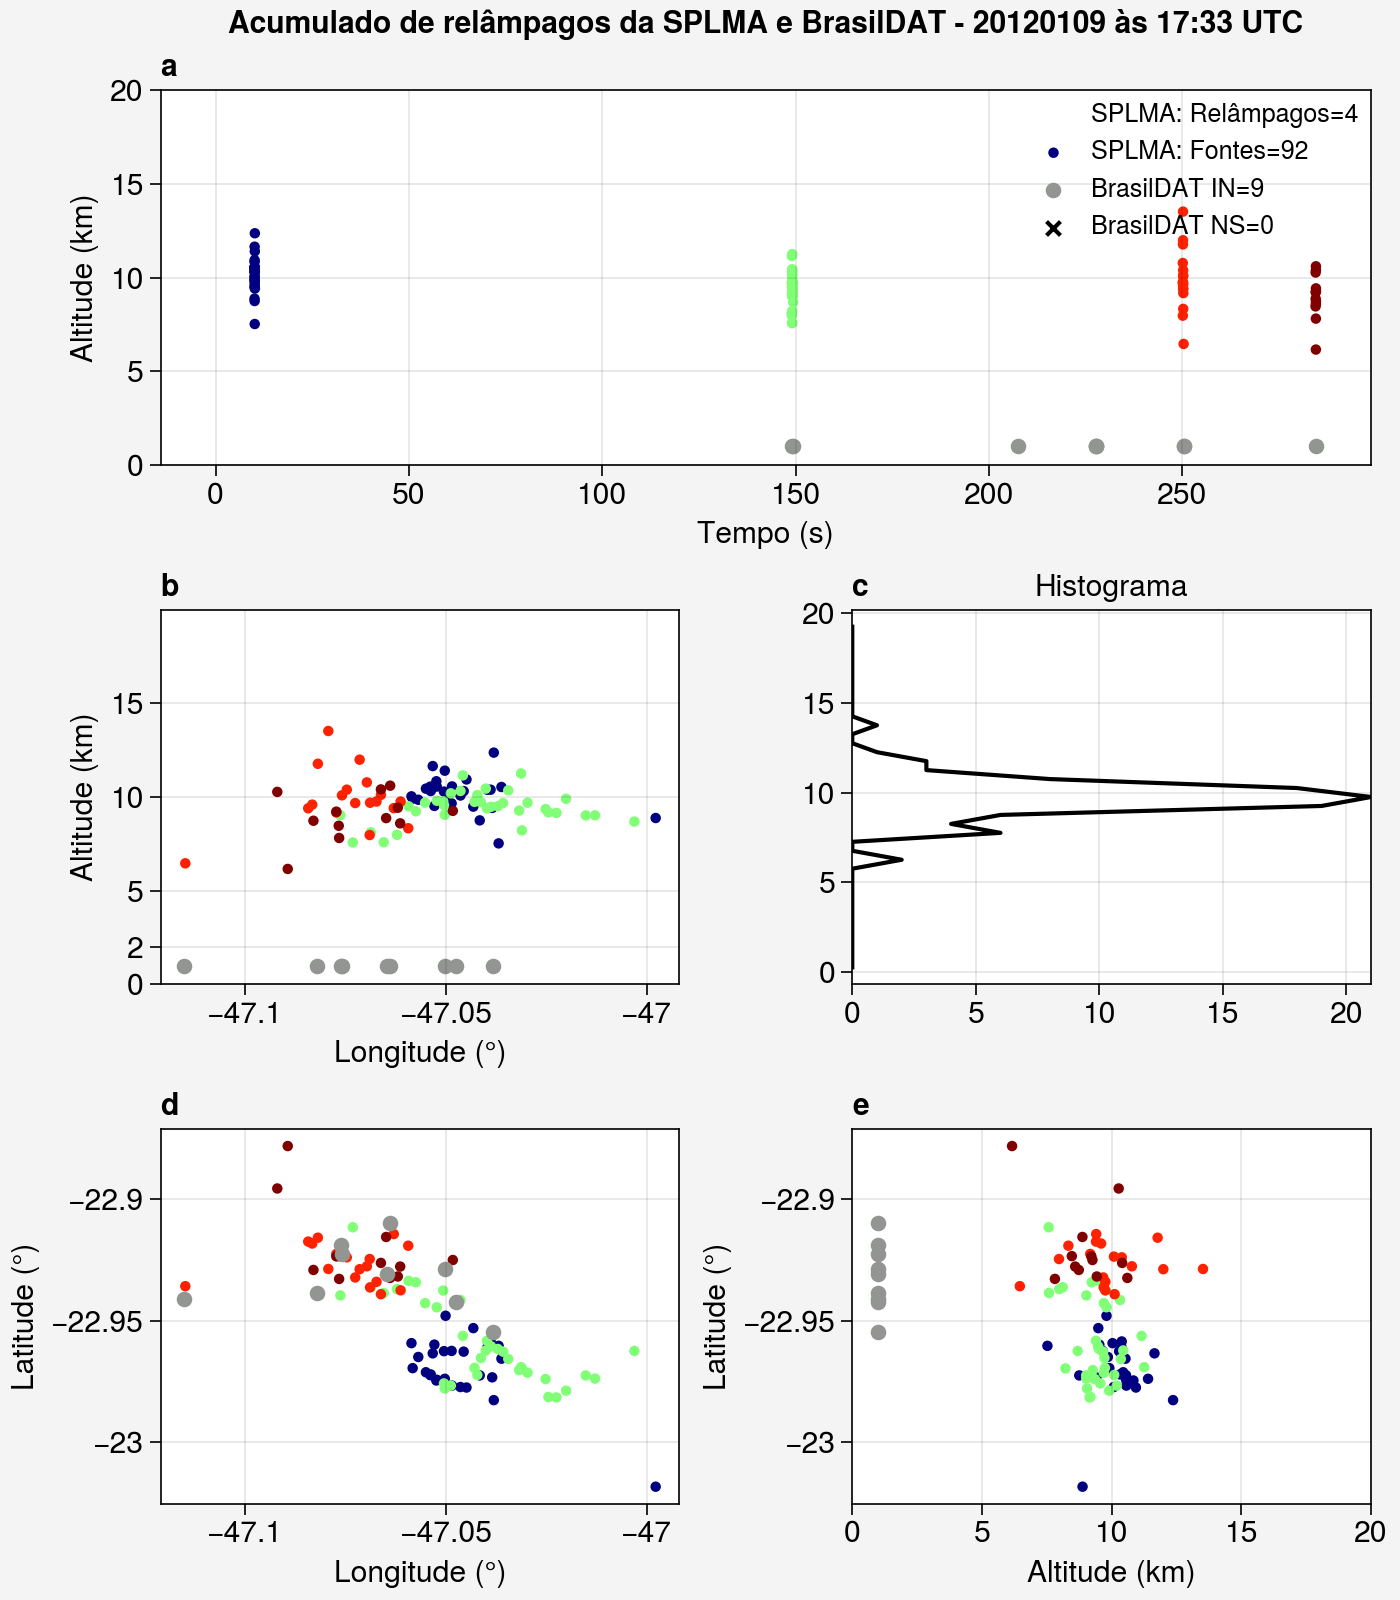

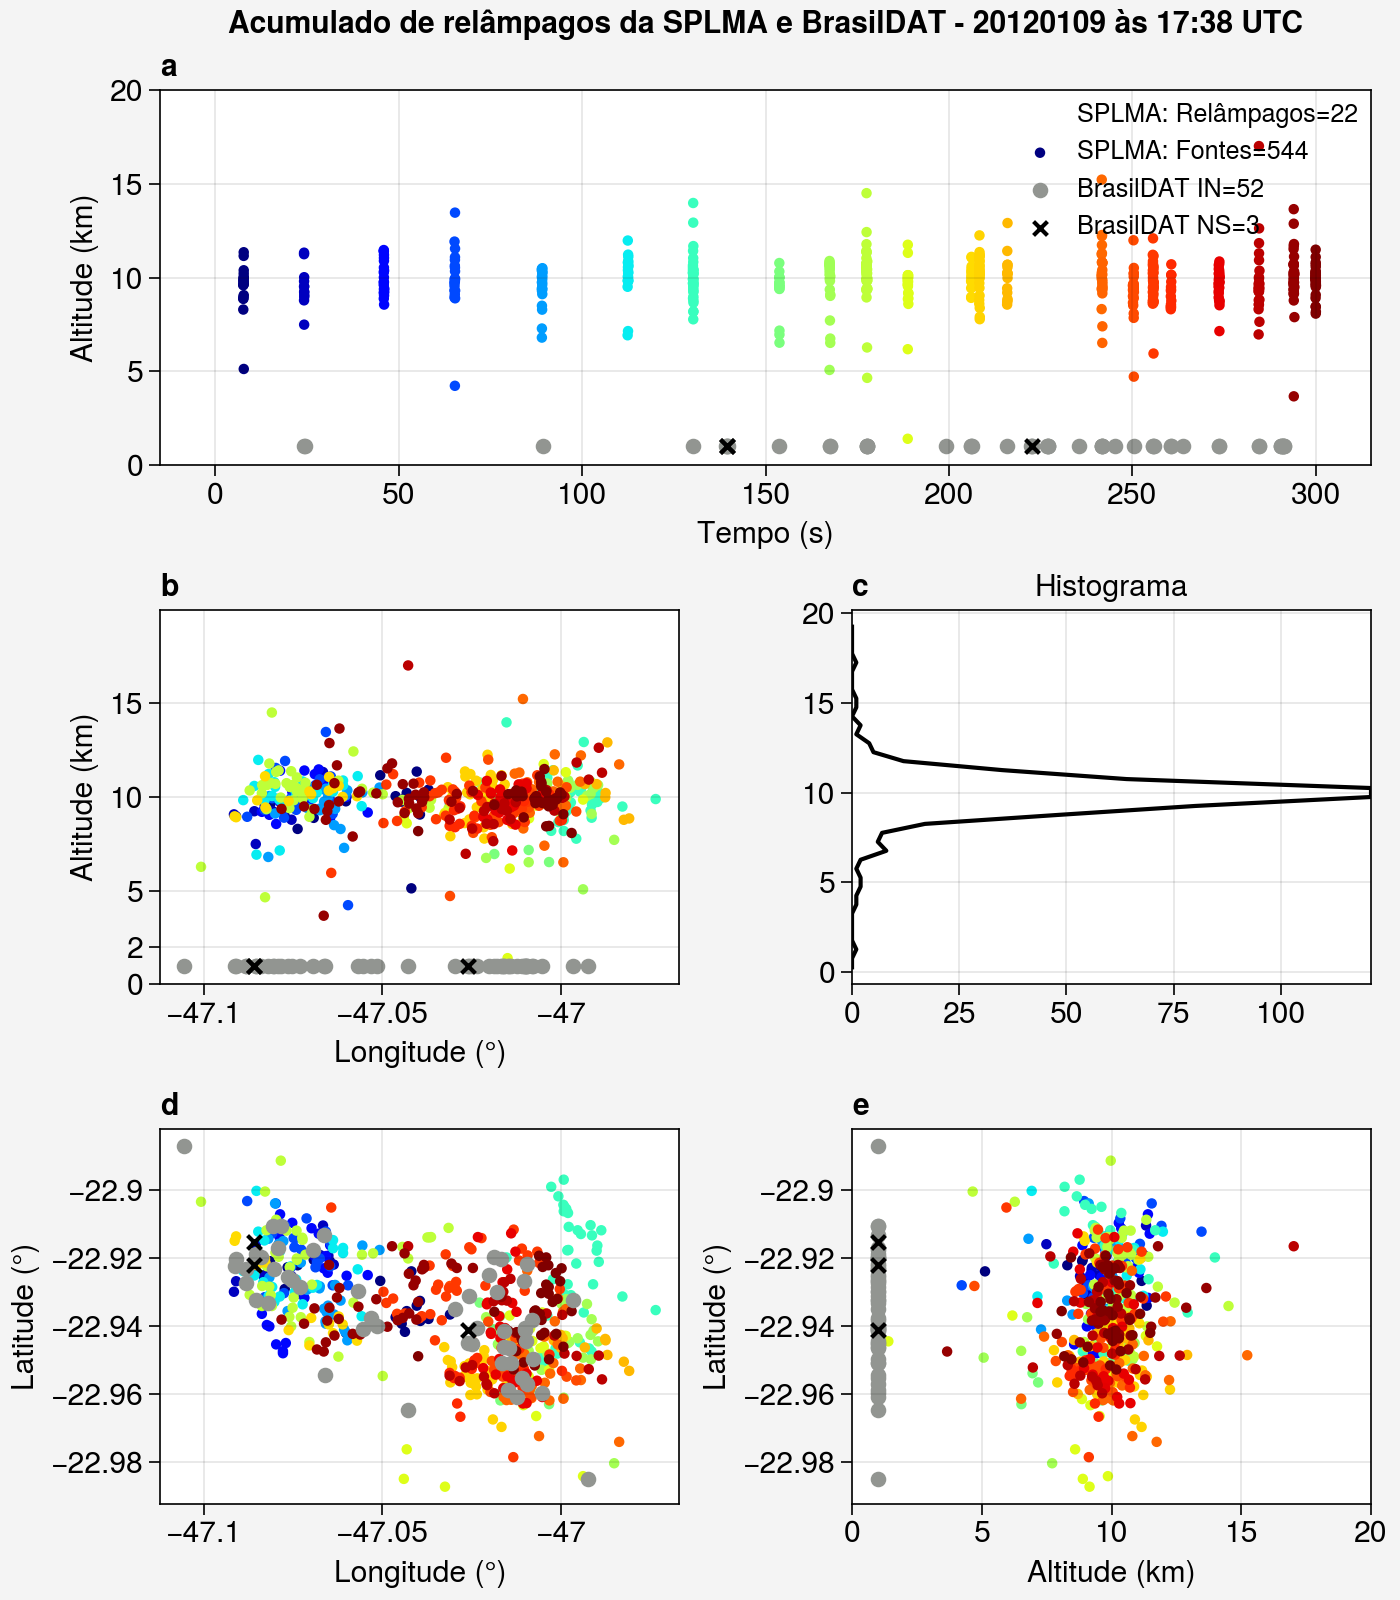

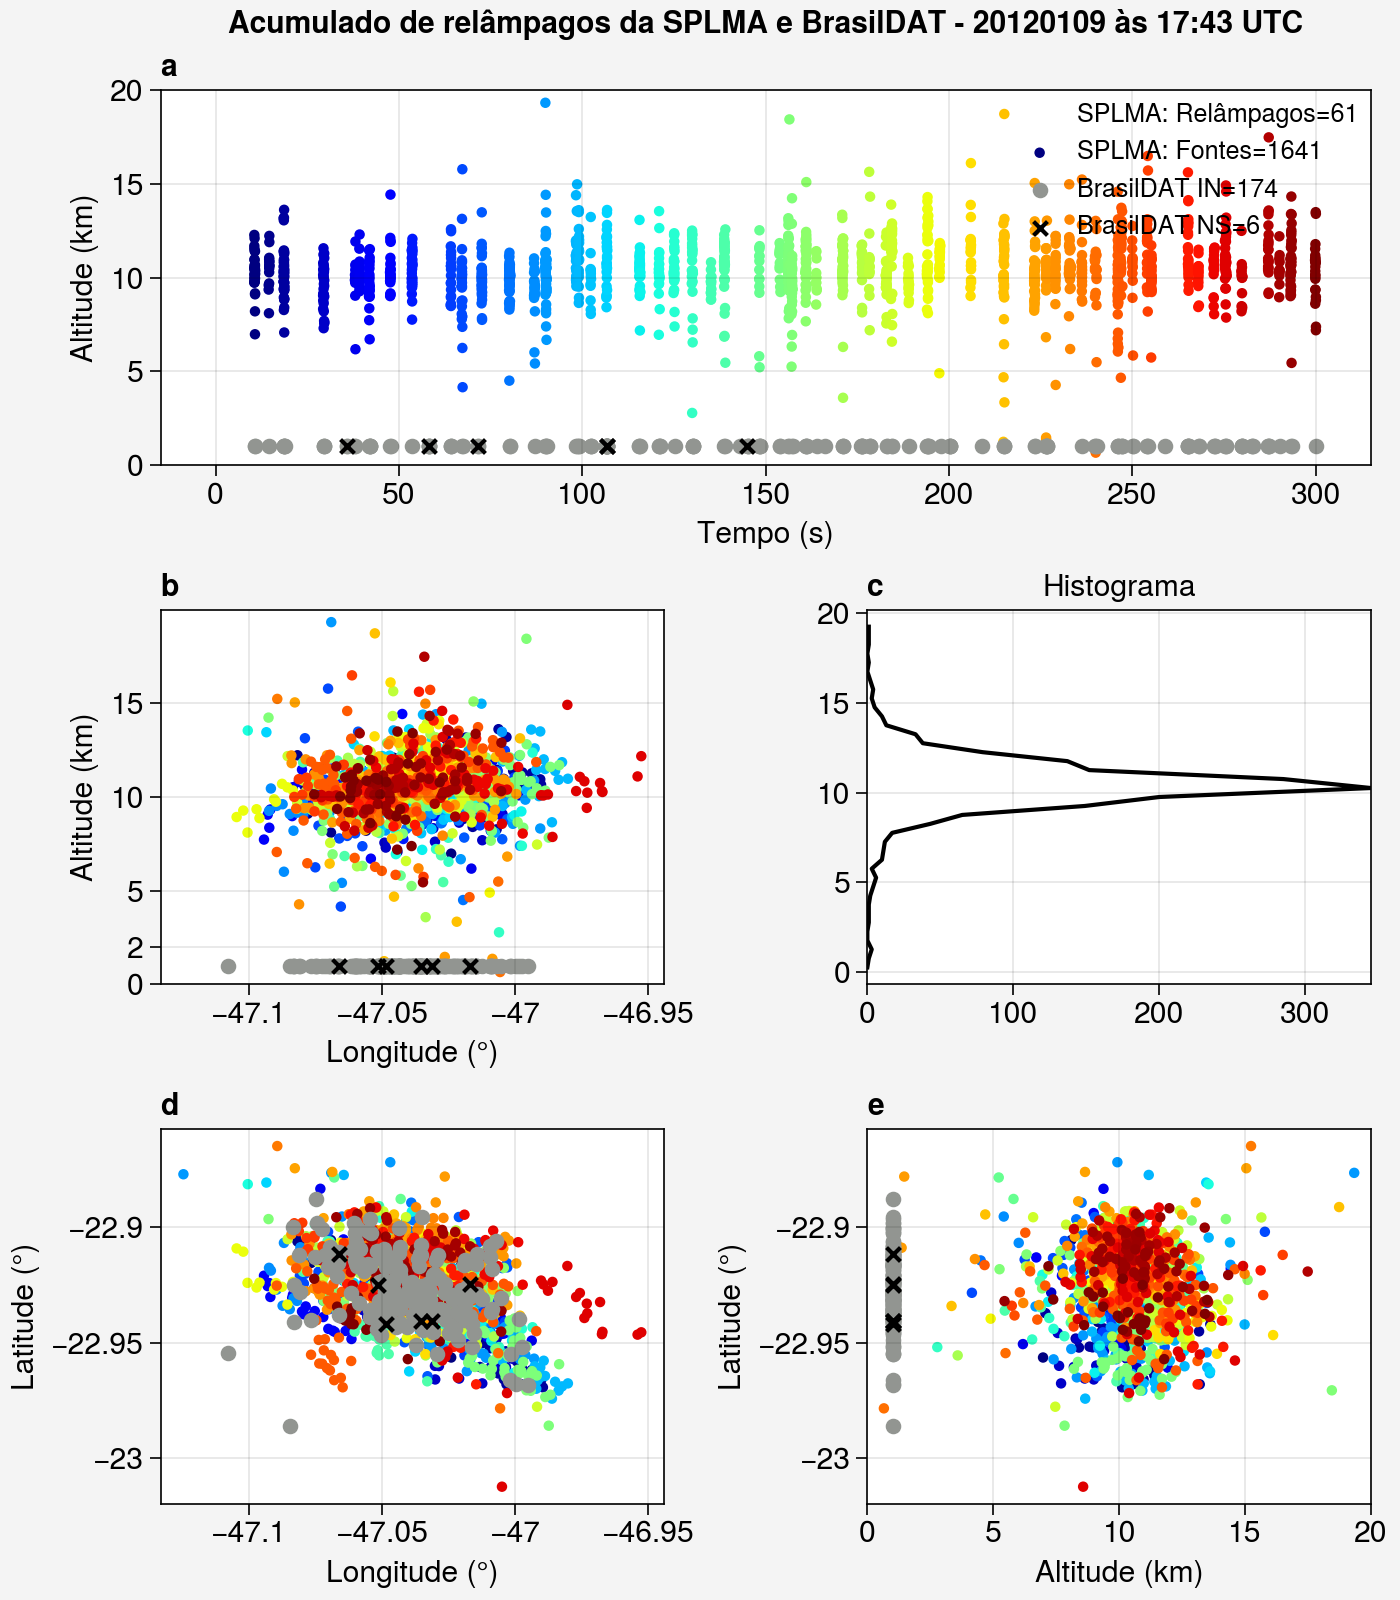

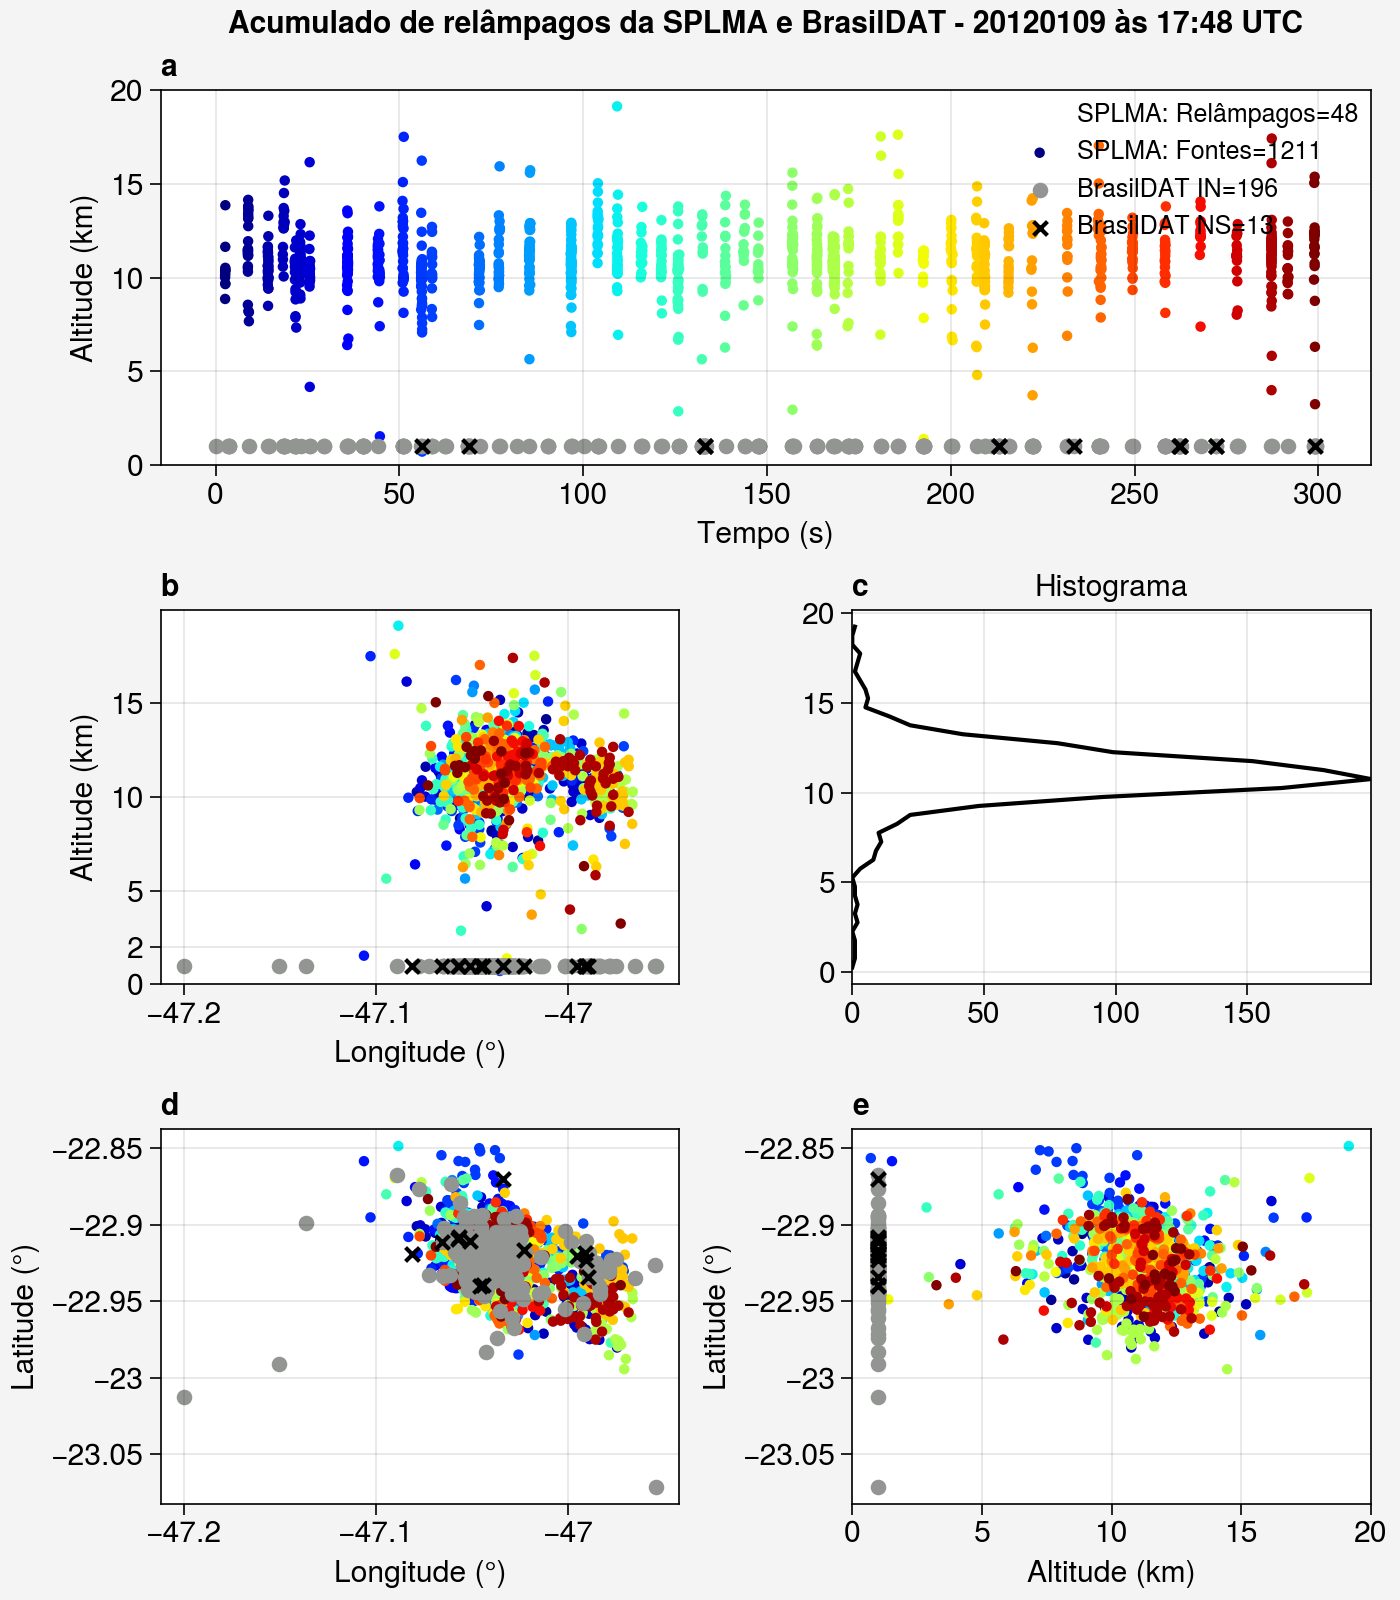

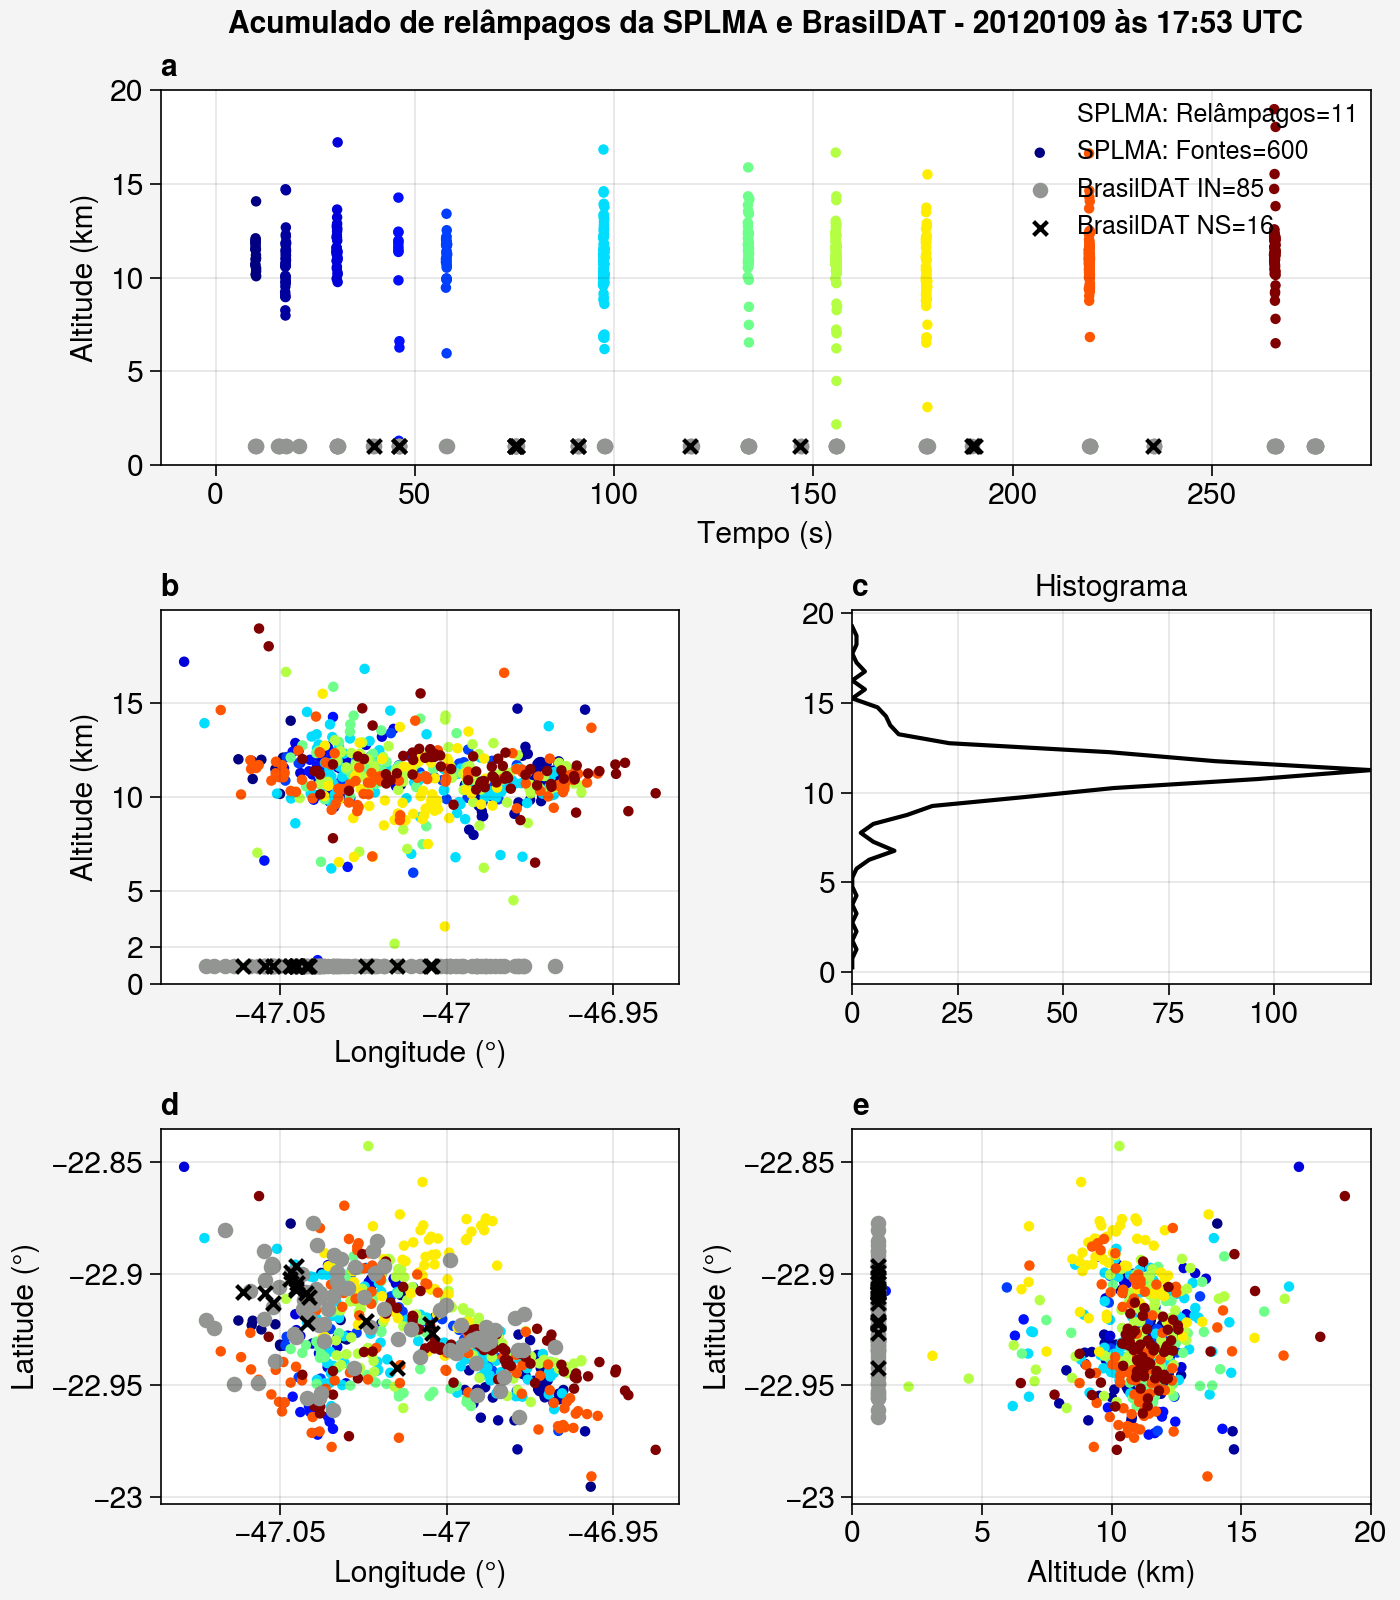

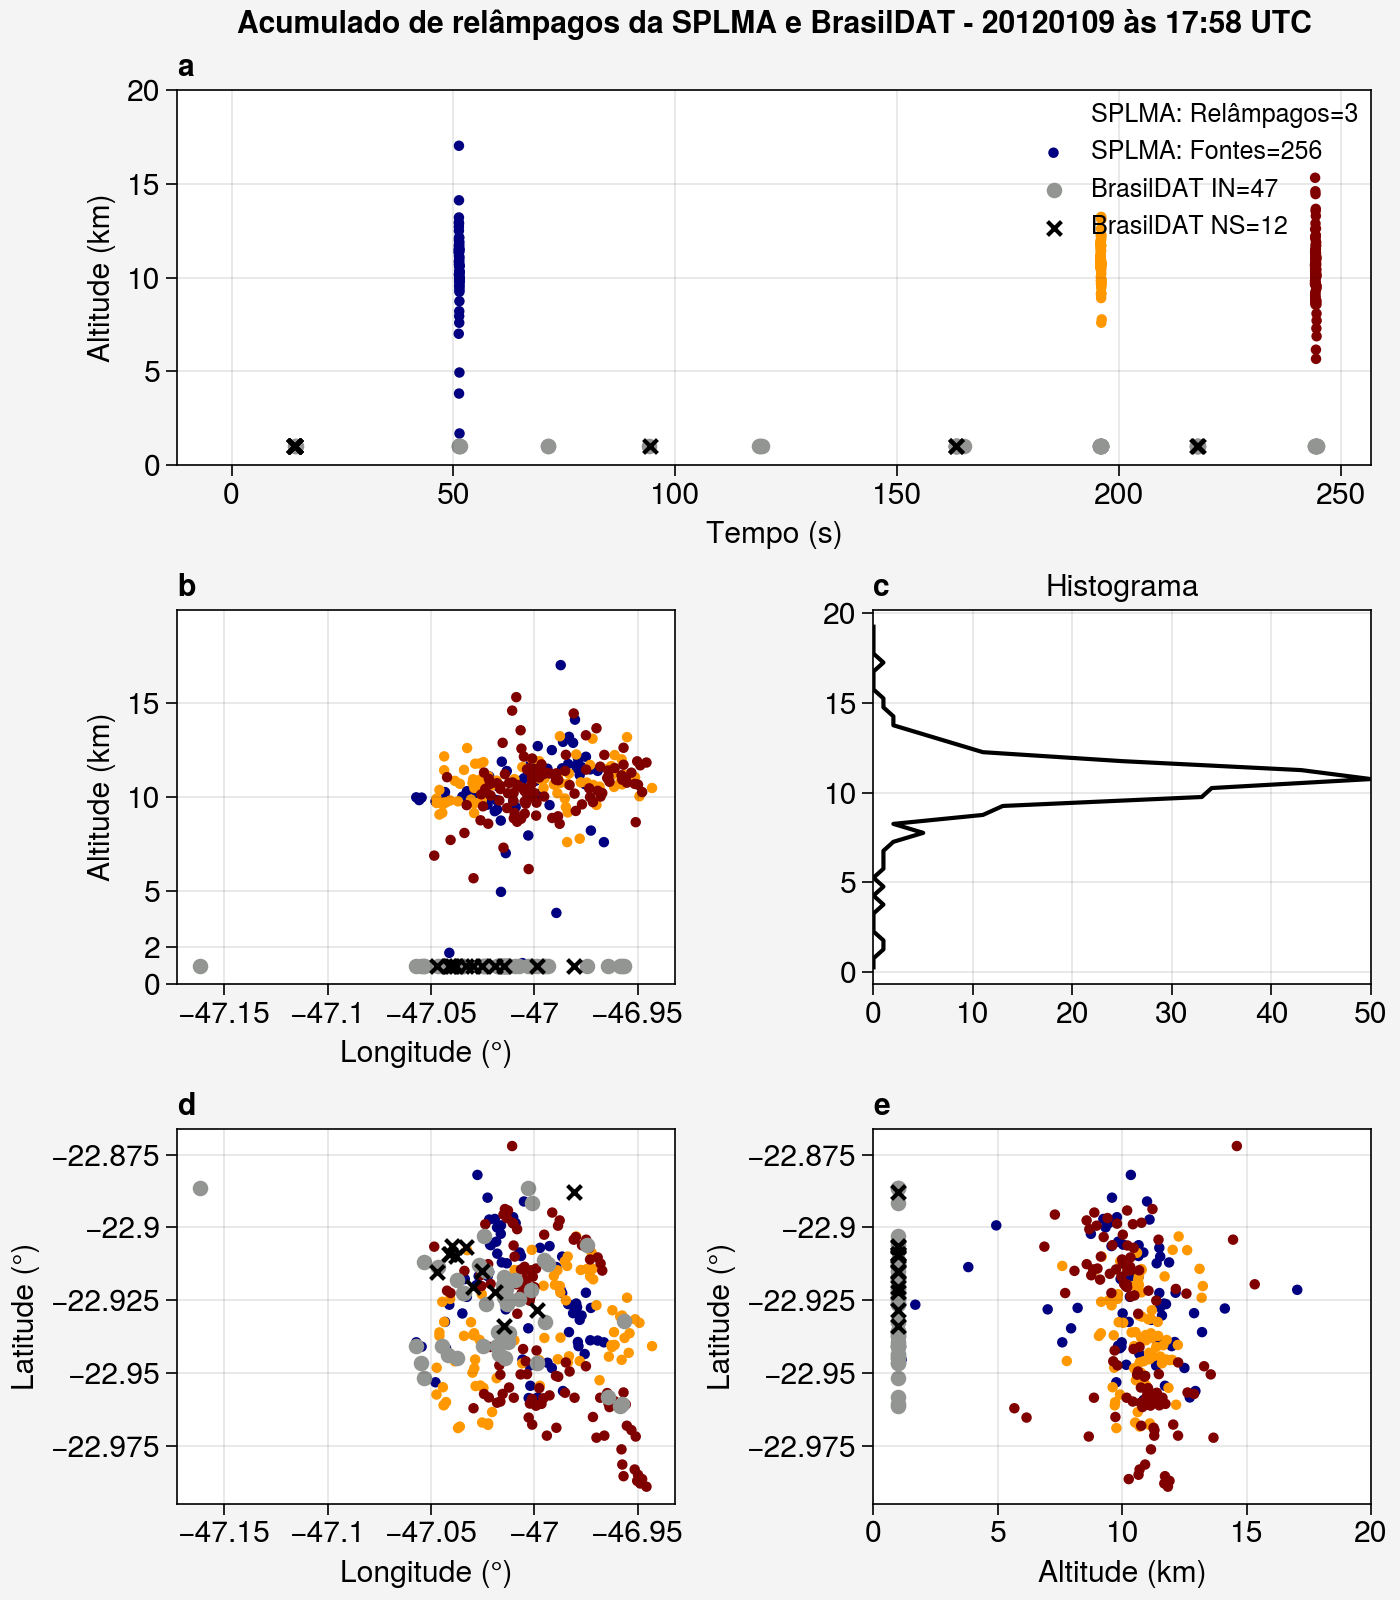

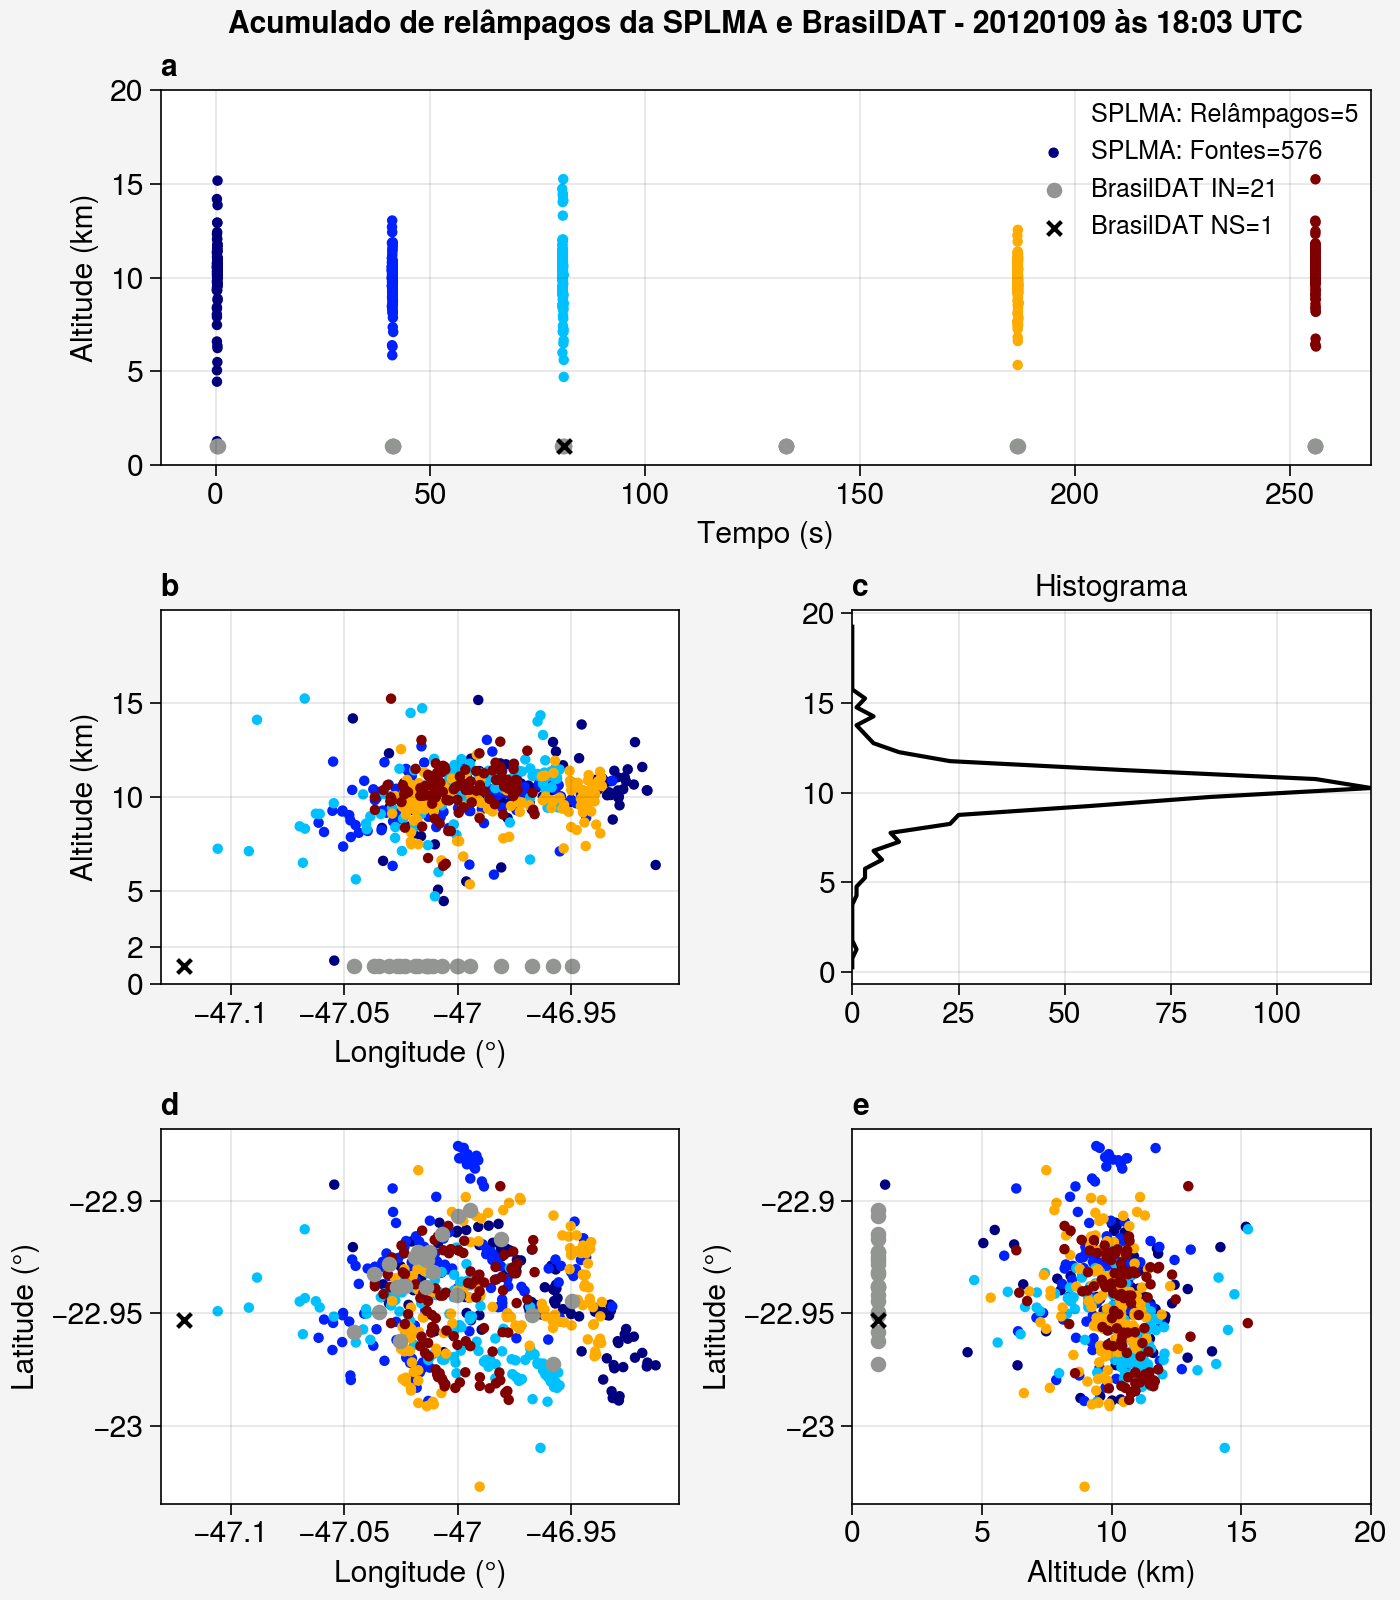

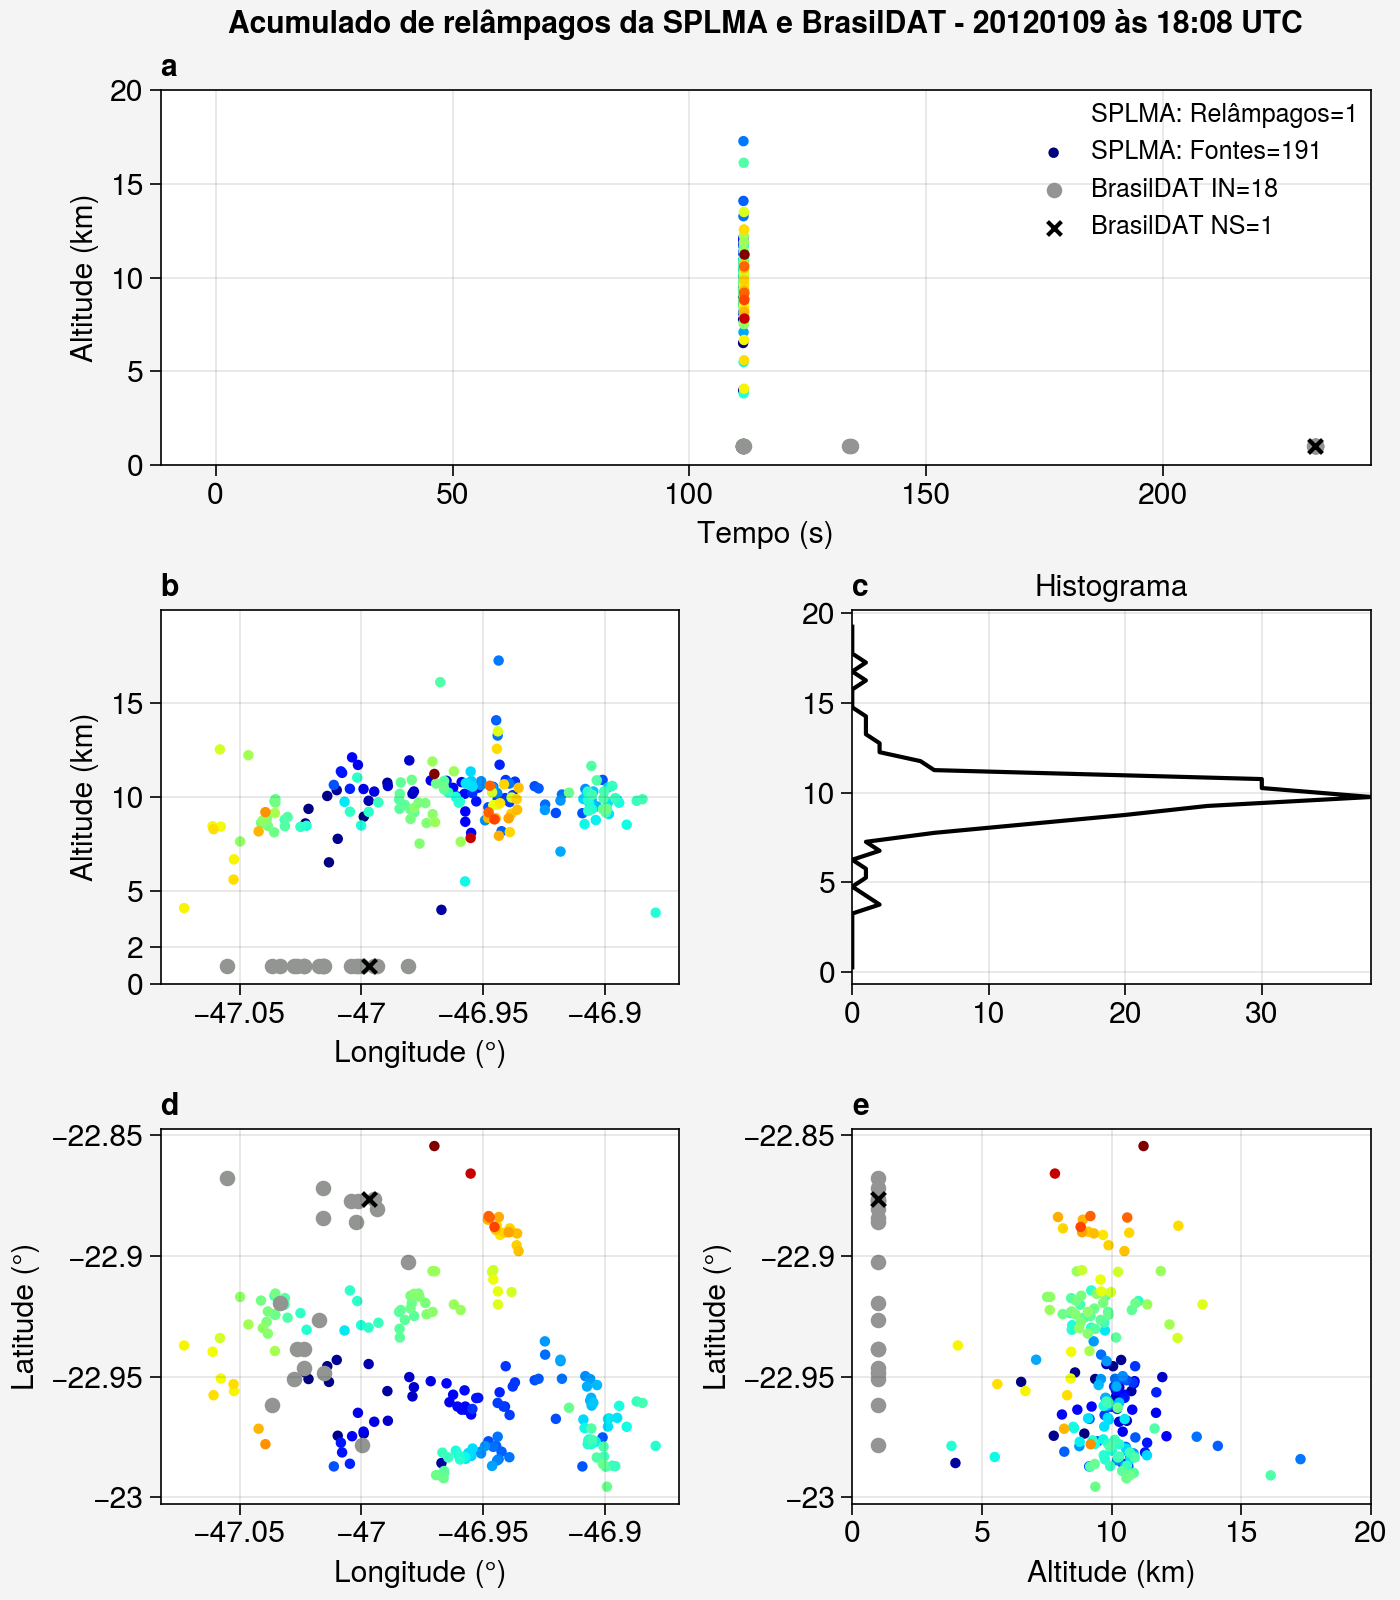

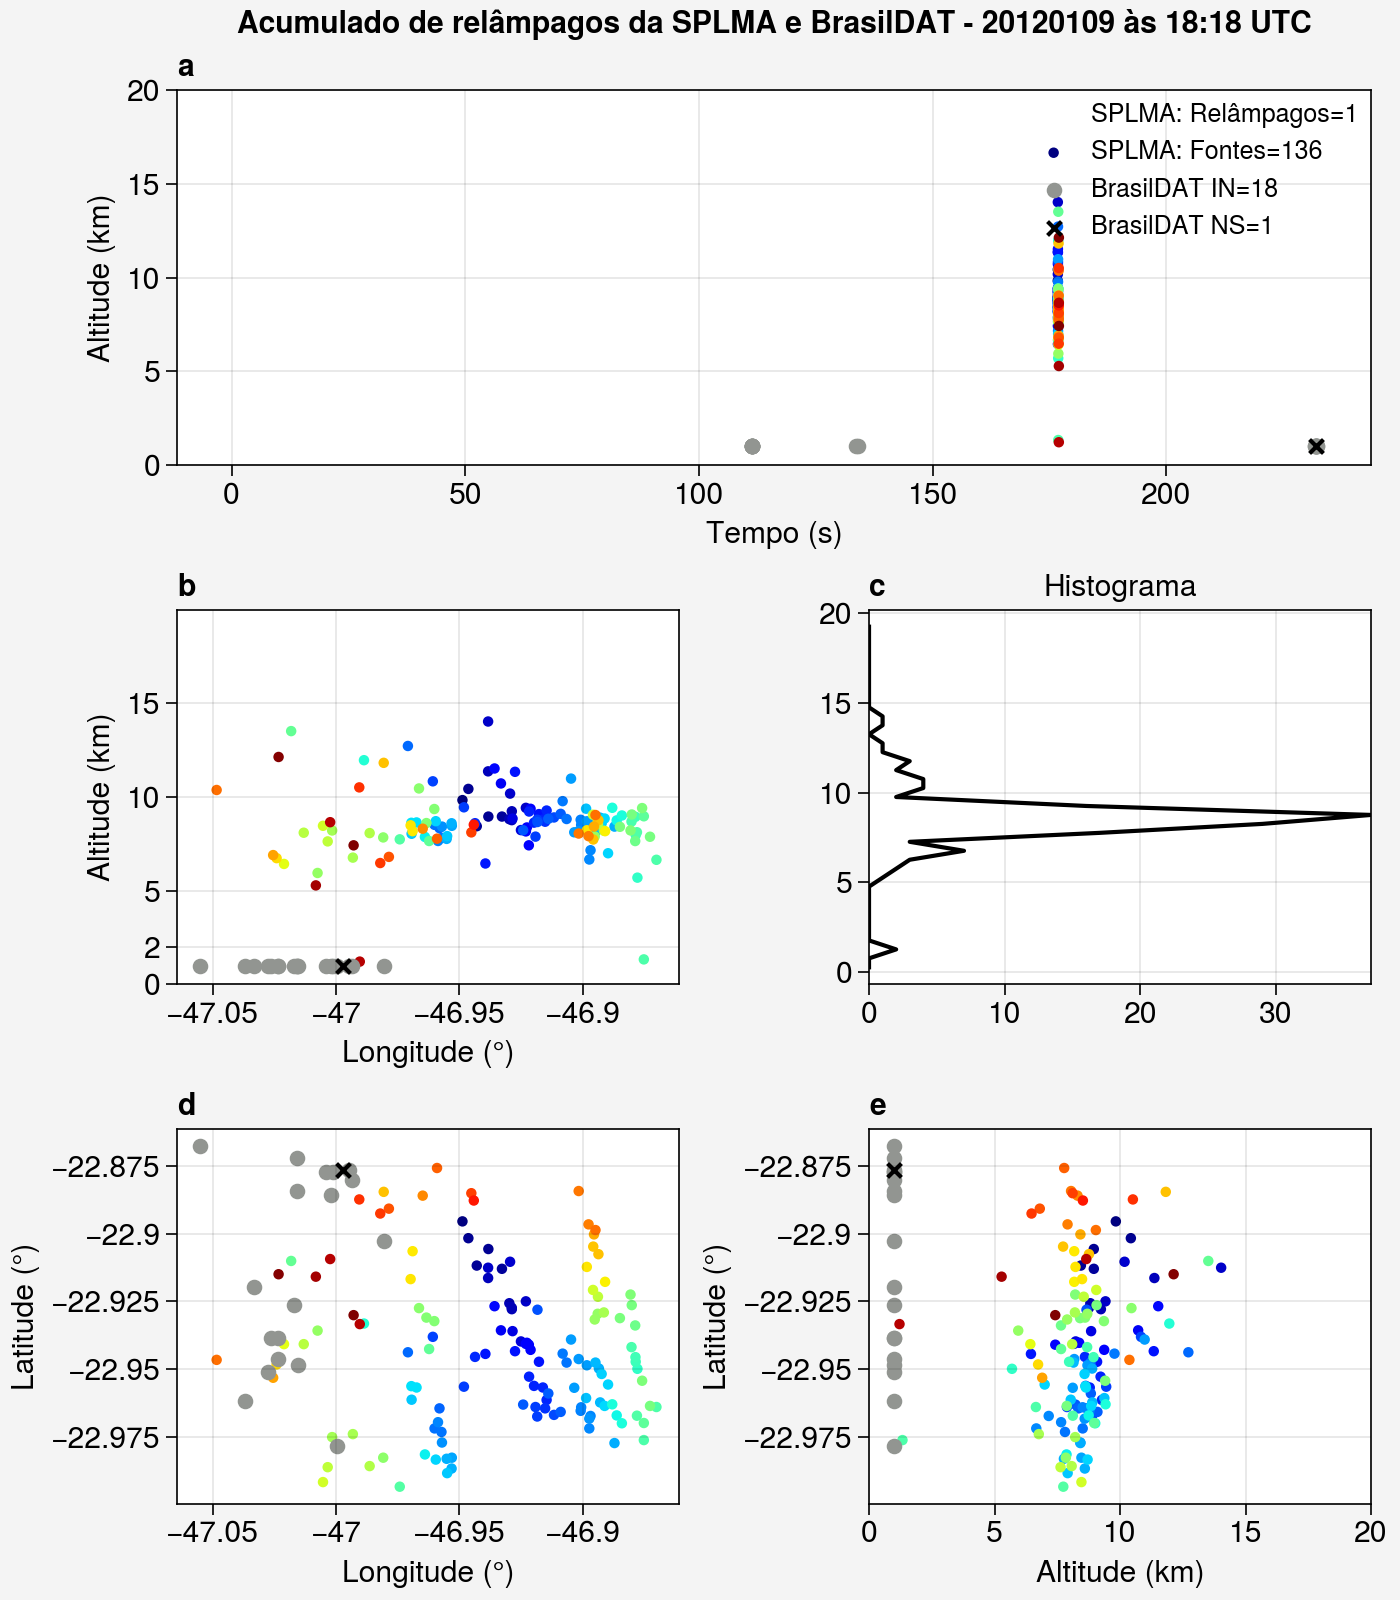

In [ ]:
flashes_lma_porimg = [] # inicializa a variável de quantidade de flashes por imagem do radar
fontes_lma_porimg = [] # inicializa a variável de quantidade de fontes por imagem do radar

# Loop dos tempos
for time, file in enumerate(files):

    print('Processando arquivo ===>>>', file)

    # ----------------------------------------- # 
    #    Extrai a data da imagem do radar    
    # ----------------------------------------- # 
    file_name = os.path.basename(os.path.splitext(file)[0])                                                                                           # nome do arquivo: "tempestade_1_20120107_1912"

    ano_radar, mes_radar, dia_radar, hor_radar, min_radar = file_name[11:15], file_name[15:17], file_name[17:19], file_name[20:22], file_name[22:24]  # extrai a data da imagem do radar

    time_ini_radar = datetime(int(ano_radar), int(mes_radar), int(dia_radar), int(hor_radar), int(min_radar), 0, 0)                                   # tempo inicial da imagem do radar no formato DateTime
 
    # ----------------------------------------- # 
    # Leitura do arquivo ASCII de relâmpagos
    # ----------------------------------------- # 
    dic_br, dic_lma, nstrokes_br, nflashes_lma = read_raios_porimagem(file)

    # ============================================================================================================================================== #
    #                                                         PROCESSAMENTO
    # ============================================================================================================================================== #
    lista_ano, lista_mes, lista_dia, lista_hor, lista_min, lista_seg, lista_lat, lista_lon, lista_alt = [], [], [], [], [], [], [], [], []
    total_fontes = 0
    val = []

    # Se aquele arquivo tem flashes da SPLMA, continua.
    if nflashes_lma > 0:

        # ----------------------------------------------------------------------------------- #
        #                1) Loop em cada relâmpago da SPLMA e coloca numa lista
        # ----------------------------------------------------------------------------------- #
        for i in range(1, nflashes_lma+1):

            # monta a identificação do flash (flash1)
            flash_id = 'flash' + str(i)
          
            # extrai as informações
            ano0, mes0, dia0 = (dic_lma[f'{flash_id}']['ano']), (dic_lma[f'{flash_id}']['mes']), (dic_lma[f'{flash_id}']['dia']) 
            hor0, min0, seg0 = (dic_lma[f'{flash_id}']['hor']), (dic_lma[f'{flash_id}']['min']), (dic_lma[f'{flash_id}']['seg'])
            lat0, lon0 = (dic_lma[f'{flash_id}']['lat']), (dic_lma[f'{flash_id}']['lon'])
            alt0 = (dic_lma[f'{flash_id}']['alt'])

            # insere os dados numa lista
            for iano, imes, idia, ihor, imin, iseg, ilat, ilon, ialt in zip(ano0, mes0, dia0, hor0, min0, seg0, lat0, lon0, alt0):
                lista_ano.append(iano) 
                lista_mes.append(imes) 
                lista_dia.append(idia) 
                lista_hor.append(ihor) 
                lista_min.append(imin) 
                lista_seg.append(iseg) 
                lista_lat.append(ilat) 
                lista_lon.append(ilon) 
                lista_alt.append(ialt) 
         
            # soma o total de fontes de cada imagem do radar
            total_fontes+= int(dic_lma[f'{flash_id}']['fontes'])

        # ----------------------------------------------------------------------------------- #
        #                  2) Transforma a lista em DataFrame
        # ----------------------------------------------------------------------------------- #
        dic = {'ano': lista_ano, 
               'mes': lista_mes,
               'dia': lista_dia,
               'hor': lista_hor,
               'min': lista_min,
               'seg': lista_seg,
               'lat': lista_lat,
               'lon': lista_lon,
               'alt': lista_alt}
        df_lma = pd.DataFrame(dic)
        df_lma = df_lma.apply(pd.to_numeric)   # transforma as colunas do dataframe para numerico

        # ----------------------------------------------------------------------------------- #
        # 3) Calcula o tempo relativo entre cada fonte de VHF e o inicio do ScanTime da imagem do radar
        # ----------------------------------------------------------------------------------- #
        # calcula microsegundos: transforma de "24.352730" para "352730"
        df_lma['segint'] = df_lma['seg'].astype(int)  # extrai a parte inteira dos segundos
        microseg = (df_lma['seg'] - df_lma['segint']) # extrai a parte real dos segundos
        microseg = microseg * 1e6                     # deixa a parte **real** dos segundos no formato que a função datetime precisa (ou seja, transforma para inteiro): 0.352730 para 352730.0
        df_lma['microseg'] = microseg.astype(int)

        # loop no datetime 
        for ii, row in enumerate(df_lma.itertuples()):
            time = datetime(row.ano, row.mes, row.dia, row.hor, row.min, row.segint, row.microseg)
            dt = (time - time_ini_radar)
            seg_since = dt.seconds + (dt.microseconds*10e-7)        
            val.append(seg_since)
        df_lma['tempo'] = val
        df_lma['tempo'] = df_lma['tempo'].astype(float)

        # transforma altura de metros para km
        df_lma['alt'] = df_lma['alt']/1000.0

        # ----------------------------------------------------------------------------------- #
        #                4) Loop em cada relâmpago da BRASILDAT e coloca numa lista
        # ----------------------------------------------------------------------------------- #
        # Se aquele arquivo tem flashes da SPLMA, continua.
        val2 = []
        if nstrokes_br > 0:
            
            # transforma o dicionário em DataFrame
            dic = {'tipo': dic_br['tipo'],
                   'ano': dic_br['ano'], 
                   'mes': dic_br['mes'],
                   'dia': dic_br['dia'],
                   'hor': dic_br['hor'],
                   'min': dic_br['min'],
                   'seg': dic_br['seg'],
                   'lat': dic_br['lat'],
                   'lon': dic_br['lon'],
                   'pc': dic_br['pc']}
            df_br = pd.DataFrame(dic)
            df_br[['ano','mes','dia','hor','min','seg','lat','lon','pc']] = df_br[['ano','mes','dia','hor','min','seg','lat','lon','pc']].apply(pd.to_numeric)   # transforma as colunas do dataframe para numerico

            # calcula o tempo relativo entre cada fonte de VHF e o inicio do ScanTime da imagem do radar
            # calcula microsegundos: transforma de "24.352730" para "352730"
            df_br['segint'] = df_br['seg'].astype(int)  # extrai a parte inteira dos segundos
            microseg = (df_br['seg'] - df_br['segint']) # extrai a parte real dos segundos
            microseg = microseg * 1e6                   # deixa a parte **real** dos segundos no formato que a função datetime precisa (ou seja, transforma para inteiro): 0.352730 para 352730.0
            df_br['microseg'] = microseg.astype(int)

            # loop no datetime 
            for ii, row in enumerate(df_br.itertuples()):
                time = datetime(row.ano, row.mes, row.dia, row.hor, row.min, row.segint, row.microseg)
                dt = (time - time_ini_radar)
                seg_since = dt.seconds + (dt.microseconds*10e-7)     
                val2.append(seg_since)
            df_br['tempo'] = val2
            df_br['tempo'] = df_br['tempo'].astype(float)

        # ----------------------------------------------------------------------------------- #
        #                       5) Plota figura
        # ----------------------------------------------------------------------------------- #
        plota_flashlma_acumulado(path_output, file, df_lma, df_br, nflashes_lma, total_fontes)
        #break

    # salva a quantidade de flashes_lma de cada imagem do radar
    flashes_lma_porimg.append(nflashes_lma) 

    # salva o total de fontes de cada imagem do radar 
    fontes_lma_porimg.append(total_fontes) 